<a href="https://colab.research.google.com/github/Schauhan21/DL/blob/main/DL2021_assign1_Subam_Chauhan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning 2021 - Assignment 1

Designed by Wuti Xiong (wuti.xiong@oulu.fi)



## Outline (15 points)
#### In this assignment, you will learn:
* How to generate random data using Pytorch.
* How to build your own Pytorch model for simple regression problem on the generated data.
* Training the model with gradient descent algorithm in Pytorch.

#### Environment
Python 3 + Pytorch (>=1.3).<br>
Other libraries should be installed correctly such as numpy, matplotlib, *etc*., according to the dependencies of the assignment. <br>
If you haven’t installed Pytorch and Jupyter notebook in your computer, an alternative environment to finish the assignment is CSC notebook: [`https://notebooks.csc.fi/`](https://notebooks.csc.fi/) -> log in with HaKa using your university account -> Jupyter Machine Learning

We will give 2 weeks for each assignment and more for the final project. So it may happen where the new assignment is published before the deadline of the previous assignment. 

#### Database
* Randomly synthesized data.

#### Hints
* To find the place where you have to insert your solution, hit Crtl + F and search for **TODO:** . You are not supposed to modify the codes from other parts.
* Be careful with the shape of the weights, gradient, .. of your tensor in your implementation. Double check and make sure the shapes fit for computation, especially matrix multiplication.

## Part 1. Generate training and testing data using Pytorch
Suppose we observe a real-valued input variable $x$ and we wish to use this observation to predict the value of a real-valued target variable $y$. For the present purposes, it is instructive to consider an artificial example using synthetically generated data because we then know the precise process that generated the data for comparison against any learned model.

We therefore generate our training data which consists of 1000 pairs of $\{x_i, y_i\}$ where $\{x_i\}$ are generated uniformly, and the corresponding target values $\{y_i\}$ are obtained by first computing the corresponding values of a pre-defined function and then adding random noise with a Gaussian distribution having standard deviation 0.5.
\begin{align*}
y_i = 2.4 * x_i^{2} -1.9 * x_i + 0.6 + \varepsilon, \varepsilon\sim \mathcal{N}(0,\,0.5^{2})
\end{align*}

The testing data is created the same way as training data **but without noise**, where the number of pairs is 100, in order to give a quantitative evaluation of the model to be trained. 

Please create the required training and testing data below and plot them. You could use [`torch.randn()`](https://pytorch.org/docs/stable/generated/torch.rand.html#torch.rand) to create the data and matplotlib.pyplot to show them. 

Here, I would like to warm you up with a simple example using the function: $y = x^2 + \varepsilon, \varepsilon\sim \mathcal{N}(0,\,0.2^{2})$

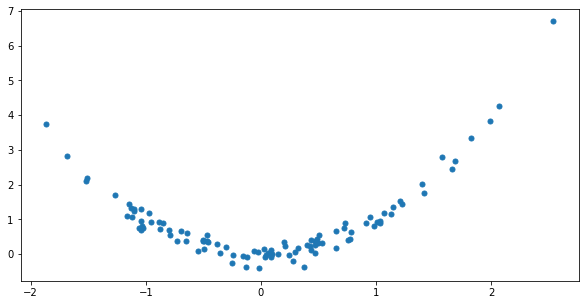

In [ ]:
import torch
import matplotlib.pyplot as plt

x = torch.randn(100)
y = torch.pow(x, 2) + torch.randn(100) * 0.2

plt.figure(figsize=(10, 5))
plt.rcParams.update({'font.size': 10})
plt.plot(x, y, marker='o', linestyle='none', markersize=5)
plt.show()

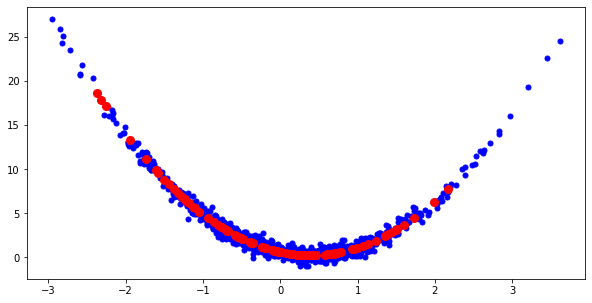

In [ ]:
# TODO: (3 points, details are given below): 
# generate 1000 training data pairs and 100 testing data pairs according to the above description.

# generate training data (1 point)
x_train = torch.randn(1000)
y_train = 2.4 * torch.pow(x_train,2) -1.9 * x_train + 0.6 + torch.randn(1000) * 0.5

# generate testing data (1 point)
x_test = torch.randn(100)
y_test = 2.4 * torch.pow(x_test,2) -1.9 * x_test + 0.6 

# draw the data in a single figure (using two different showing styles) (1 point)
plt.figure(figsize=(10, 5))
plt.rcParams.update({'font.size': 10})
plt.plot(x_train, y_train, marker='o', linestyle='none', markersize=5, color="blue")
plt.plot(x_test, y_test, marker='o', linestyle='none', markersize=8, color="red")
plt.show()

The plot figure should be like this. However, you could have your own showing styles.

## Part 2. Solving the regression problem in Pytorch using Gradient Descent Algorithm

### 2.1 Data
Congratulations if you generate the data correctly! However, to make sure all of you use the same data, we have generated it in advance. 

In [ ]:
data = torch.load('dataset.pt')
x_train = data['x_train']
y_train = data['y_train']
x_test = data['x_test']
y_test = data['y_test']

### 2.2 Model
In this part, you will define your own model class. To do that, you have to remember the following rules:
1. The model class should be inherited from [`nn.Module`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module);
2. Re-write the **\_\_init\_\_** function and the **forward** function;
3. In the **\_\_init\_\_** function, you should always call the parent's **\_\_init\_\_** function first.

To make it simpler, suppose we have already known the main structure of the function that generated the data:
\begin{align*}
y = a * x^2 + b*x + c.
\end{align*}

Therefore, in the model, we need to set 3 parameters: $a$, $b$ and $c$.

In [ ]:
# TODO (3.5 points, details are given below)
import torch.nn as nn

class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.a = torch.nn.Parameter(torch.randn(()))
        self.b = torch.nn.Parameter(torch.randn(()))
        self.c = torch.nn.Parameter(torch.randn(()))
    
    def forward(self, x):
        return self.c + self.b * x + self.a * x ** 2
    
# define a class (0.5) + write the __init__ function (1.5 point) + write the forward function (1.5 points)
        



### 2.3 Training
Here, you will train your model based on the training data and evaluate the model on testing data.
1. Set proper number of iterations and learning rate.
2. Remember to use a proper optimizer (you may have many choices: Adam, SGD, RMSprop, ... please find the detailed information in https://pytorch.org/docs/stable/optim.html and know how to use them).
3. In order to train the model, a loss function should be defined:
\begin{align*}
loss = \frac{1}{N}\sum_{i=1}^{N}|f_i - y_i|,
\end{align*}
where, $f_i$ is the output of the model and $N$ is the number of training data pairs.
4. The model must be trained only using training data.
5. Remember to clear the old gradients of parameters before a new backward propagation.
6. In every certain number of iterations, print the values of the parameters, the training loss, and the testing loss.
7. Meanwhile, please track the training loss and the testing loss in each iteration. Once the training is done, the curves of losses should be plotted (two curves are drawn in the same figure, where x axis indicates iterations and y axis indicates the losses).
8. Lastly, draw all the training data, testing data and the curve of the trained model in the same figure (use different showing styles to distinguish them).

In [ ]:
# TODO: (8.5 points, details are given below)

# Make a instance of the model class (0.5 point)
model = Model()

# create an optimizer, set a workable learing rate (0.5 point + 0.5 point)
optimizer = torch.optim.SGD(model.parameters(), lr=5e-5)

training_losses = []
testing_losses = []
y_function = []
n_itr = 10000

for i in range(n_itr):
 
    # Train
    model.train() # change model to train mode
    # forward propagation
    y_pred = model(x_train)
    # calculate the output of model (0.5 point)
    loss = torch.mean(torch.abs(y_pred-y_train))
    # calculate loss according to the above equation (0.5 point)
    training_losses.append(loss)

    # backward propagation 
    # clear old gradients (0.5)
    optimizer.zero_grad()
    # calculate gradients of parameters (1 point)
    loss.backward()
    # gradient descent algorithm (1 point)= 
    optimizer.step()
    
    
    # Evaluate, calculate the testing loss (0.5 point)
    model.eval()
    y_eval = model(x_test) # change model to eval mode
    eval_loss = torch.mean(torch.abs(y_eval-y_test))
    testing_losses.append(eval_loss)
    
    # print intermediate results in every certain iterations (1 point)
    if i % 100 == 1:
        print("Iteration: ", i," | a: ", model.a.item() ,"b: ", model.b.item(), " | c: ", model.c.item(), " | Training loss: ", loss.item(), " | Testing loss: ", eval_loss.item())
    

Iteration:  1  | a:  0.6032120585441589 b:  -0.7532192468643188  | c:  -0.7585440278053284  | Training loss:  16.357513427734375  | Testing loss:  16.634265899658203
Iteration:  101  | a:  0.6449591517448425 b:  -0.7532192468643188  | c:  -0.7535551190376282  | Training loss:  16.003948211669922  | Testing loss:  16.27435874938965
Iteration:  201  | a:  0.6867062449455261 b:  -0.7532192468643188  | c:  -0.748566210269928  | Training loss:  15.650384902954102  | Testing loss:  15.914447784423828
Iteration:  301  | a:  0.7284533381462097 b:  -0.7532192468643188  | c:  -0.7435773015022278  | Training loss:  15.296819686889648  | Testing loss:  15.55453872680664
Iteration:  401  | a:  0.7702004313468933 b:  -0.7532192468643188  | c:  -0.7385883927345276  | Training loss:  14.943253517150879  | Testing loss:  15.194629669189453
Iteration:  501  | a:  0.8119475245475769 b:  -0.7532192468643188  | c:  -0.7335994839668274  | Training loss:  14.589690208435059  | Testing loss:  14.8347177505493

The output should be like this:

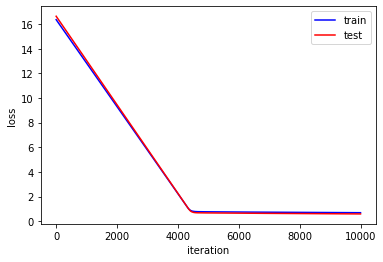

In [ ]:
# plot the traing losses (0.5 point) and testing losses (0.5 point)
plt.plot(range(n_itr),training_losses, color = "blue")
plt.plot(range(n_itr),testing_losses, color = "red")
plt.xlabel('iteration')
plt.ylabel('loss')
plt.legend(["train", "test"])
plt.show()

The curves should be like this:

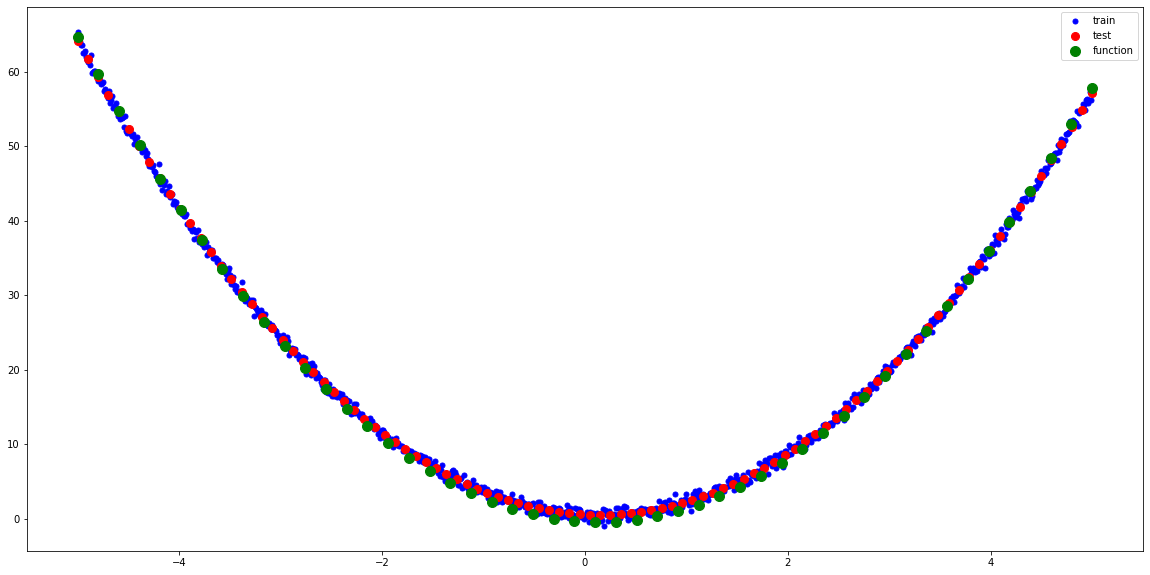

In [ ]:

# plot all the training data, testing data and the curve of function (1 point)

plt.figure(figsize=(20, 10))
plt.rcParams.update({'font.size': 10})
plt.plot(x_train, y_train, marker='o', linestyle='none', markersize=5, color="blue")
plt.plot(x_test, y_test, marker='o', linestyle='none', markersize=8, color="red")
x = torch.linspace(-5,5,50)
y_function = model(x).detach().numpy()
plt.plot(x, y_function, marker='o', linestyle='none', markersize=10, color="green")
plt.legend(["train", "test","function"])
plt.show()

The figure should be like this: